# Distance Metrics in Machine Learning

### Continuous or numerical variables:

### Euclidean Distance
Represents the shortest distance between two points.

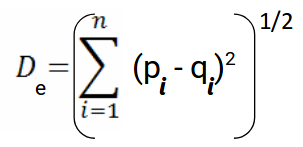
This calculation is related to the L2 vector norm.

In [1]:
# Importing the library
from scipy.spatial import distance

# Defining the points
point_1 = (6, 5, 4)
point_2 = (3, 2, 1)
point_1, point_2

((6, 5, 4), (3, 2, 1))

In [2]:
# Computing the Euclidean distance
euclidean_distance = distance.euclidean(point_1, point_2)
print('Euclidean distance between', point_1, 'and', point_2, 'is:', euclidean_distance)

Euclidean distance between (6, 5, 4) and (3, 2, 1) is: 5.196152422706632


In [3]:
# Function to calculate Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

### Manhattan Distance
Sum of absolute differences between points across all the dimensions (taxicab geometry).

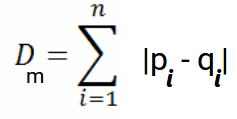
The Manhattan distance is related to the L1 vector norm.

And it is preferred over the Euclidean distance metric as the dimension of the data increases. This occurs due to something known as the ‘curse of dimensionality’.

In [4]:
from scipy.spatial.distance import cityblock

In [5]:
# Computing the Manhattan distance
manhattan_distance = distance.cityblock(point_1, point_2)
print('Manhattan distance between', point_1, 'and', point_2, 'is:', manhattan_distance)

Manhattan distance between (6, 5, 4) and (3, 2, 1) is: 9


### Minkowski Distance
The generalized form of Euclidean and Manhattan Distance.

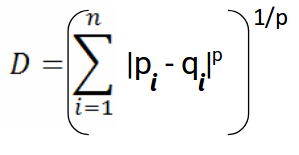
Where “p” is the order parameter.
When p is set to 1, the calculation is the same as the Manhattan distance. When p is set to 2, it is the same as the Euclidean distance.

The Minkowski distance is related to the Lp vector norm.

It is common to use Minkowski distance when implementing a machine learning algorithm that uses distance measures as it gives control over the type of distance measure used for real-valued vectors via a hyperparameter “p” that can be tuned.

In [6]:
from scipy.spatial.distance import cityblock

In [7]:
# Computing the Minkowski distance
minkowski_distance = distance.minkowski(point_1, point_2, p=3)
print('Minkowski distance between', point_1, 'and', point_2, 'is:', minkowski_distance)

Minkowski distance between (6, 5, 4) and (3, 2, 1) is: 4.3267487109222245


### Vector Norm
The length of a vector is a non-negative number that describes the extent of the vector in space, and is sometimes referred to as the vector’s magnitude or the norm.

**Vector L1 Norm**

The length of a vector can be calculated using the L1 norm. The L1 norm, represented as ||v||1 is calculated as the sum of the absolute vector values, where the absolute value of a scalar uses the notation |a1|. Clearly, the norm is a calculation of the Manhattan distance from the origin of the vector space.

||v||1 = |a1| + |a2| + |a3|

In [8]:
# L1 norm of a vector
from numpy import array
from numpy.linalg import norm
a = array([1, 2, 3])
print(a)
l1 = norm(a, 1)
print(l1)

[1 2 3]
6.0


**Vector L2 Norm**

The L2 norm, represented as ||v||2 is calculated as the square root of the sum of the squared vector values.Clearly, the norm is a calculation of the Euclidean distance from the origin of the vector space.

||v||2 = sqrt(a1² + a2² + a3²)

In [9]:
# L2 norm of a vector
from numpy import array
from numpy.linalg import norm
a = array([1, 2, 3])
print(a)
l2 = norm(a)
print(l2)

[1 2 3]
3.7416573867739413


**Vector Lp Norm**

The Lp norm, represented as ||v||p is a calculation of the Minkowski distance from the origin of the vector space.

||v||p = (a1^p + a2^p + a3^p)^(1/p)

### Categorical variables:

### Hamming Distance
Measures the similarity between two strings of the same length. The Hamming Distance between two strings of the same length is the number of positions at which the corresponding characters are different.

In [10]:
from scipy.spatial.distance import hamming

# Defining two strings
string_1 = 'euclidean'
string_2 = 'manhattan'

In [11]:
# Computing the harmming distance
hamming_distance = distance.hamming(list(string_1), list(string_2)) * len(string_1)
print('Hamming Distance between', string_1, 'and', string_2, 'is: ', hamming_distance)

Hamming Distance between euclidean and manhattan is:  7.0


Hamming distance only works when we have strings or arrays of the same length.

### Cosine Distance & Cosine Similarity
Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity.

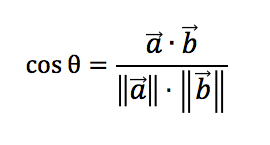
Cosine similarity is given by Cos θ, and cosine distance is 1- Cos θ.

Cosine distance metric is mainly used to find the amount of similarity

In [12]:
documents = (
"The sky is blue",
"The sun is bright",
"The sun in the sky is bright",
"We can see the shining sun, the bright sun")

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(documents)
print(count_matrix.shape)

(4, 11)


In [14]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(count_matrix[0:1], count_matrix)

array([[1.        , 0.5       , 0.66666667, 0.2773501 ]])

The first value of the array is 1.0 because it is the Cosine Similarity between the first document with itself. Due to the presence of similar words on the third document (“The sun in the sky is bright”), it achieved a better score.

**Bonus**

To understand the CountVectorizer

In [15]:
print(count_matrix)
print()
count_array = count_matrix.toarray()
df = pd.DataFrame(data=count_array,columns = count_vectorizer.get_feature_names())
print(count_array)
print()
print(df)
print()
# Position of the words in the matrix
print(count_vectorizer.vocabulary_)

  (0, 0)	1
  (0, 4)	1
  (0, 7)	1
  (0, 9)	1
  (1, 1)	1
  (1, 4)	1
  (1, 8)	1
  (1, 9)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (2, 7)	1
  (2, 8)	1
  (2, 9)	2
  (3, 1)	1
  (3, 2)	1
  (3, 5)	1
  (3, 6)	1
  (3, 8)	2
  (3, 9)	2
  (3, 10)	1

[[1 0 0 0 1 0 0 1 0 1 0]
 [0 1 0 0 1 0 0 0 1 1 0]
 [0 1 0 1 1 0 0 1 1 2 0]
 [0 1 1 0 0 1 1 0 2 2 1]]

   blue  bright  can  in  is  see  shining  sky  sun  the  we
0     1       0    0   0   1    0        0    1    0    1   0
1     0       1    0   0   1    0        0    0    1    1   0
2     0       1    0   1   1    0        0    1    1    2   0
3     0       1    1   0   0    1        1    0    2    2   1

{'the': 9, 'sky': 7, 'is': 4, 'blue': 0, 'sun': 8, 'bright': 1, 'in': 3, 'we': 10, 'can': 2, 'see': 5, 'shining': 6}
